# Visualizing Data
A fundamental part of data scientists toolkit is data vizualizatoin. There are two primary uses for this
- To explore data
- To communicate data
In this notebook we will be following Chapter 3 of the Book Data Science From Scratch by Joel Grus and build skills to start exploring data and to produce visualizations.

In [ ]:
# !pip install pandas numpy matplotlib

In [11]:
import matplotlib.pyplot as plt
import numpy as np

## Line Charts

A line chart, also known as a line graph or line plot, is a type of graph that displays a series of data points connected by straight line segments. It's a common way to visualize trends and patterns in data, particularly when showing changes over time or across other continuous variables. 

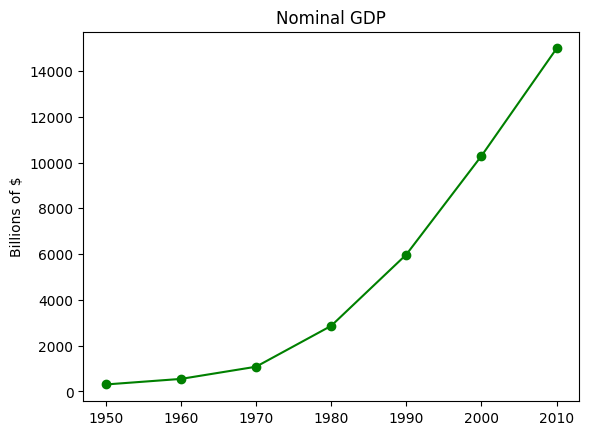

In [5]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]

gdp = [300.2, 543.3, 1075.9, 2862.1, 5979.6, 10290.7, 14987.3]

plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title('Nominal GDP')
plt.ylabel('Billions of $')
plt.show()

## Bar Charts

These are good choice when you want to show how some quantity varies among soime discrete set of items.

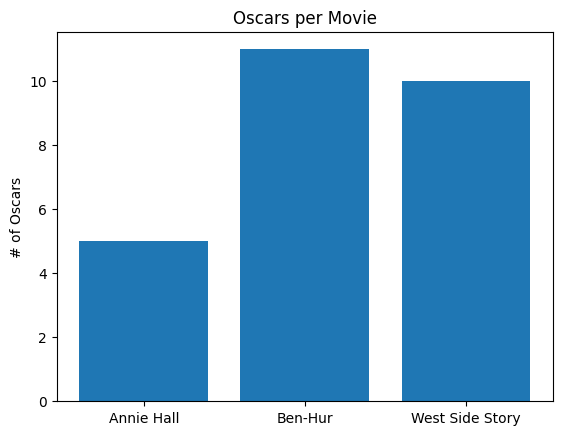

In [9]:
movies = ['Annie Hall', 'Ben-Hur', 'West Side Story']
num_oscars = [5, 11, 10]

plt.bar(movies, num_oscars)
plt.title('Oscars per Movie')
plt.ylabel('# of Oscars')
plt.show()

## Histograms
histogram are a good choice for plotting  bucketted numeric values. They are a simple but effective way of exploring distributions

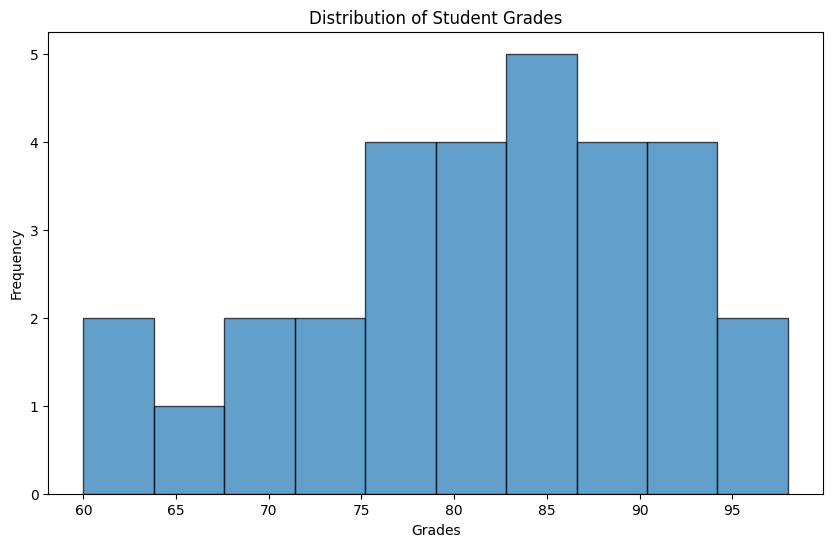

In [10]:
grades = [78, 85, 92, 65, 78, 88, 95, 72, 80, 85, 60, 90, 98, 75, 82, 85, 91, 77, 84, 89, 70, 68, 93, 81, 76, 83, 87, 94, 62, 79]

# Create the histogram

plt.figure(figsize=(10, 6))
plt.hist(grades, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Distribution of Student Grades')
plt.show()

## Multiple Plots on Same Figure
Extending the line plot further, we can have multiple plots on the same figure.

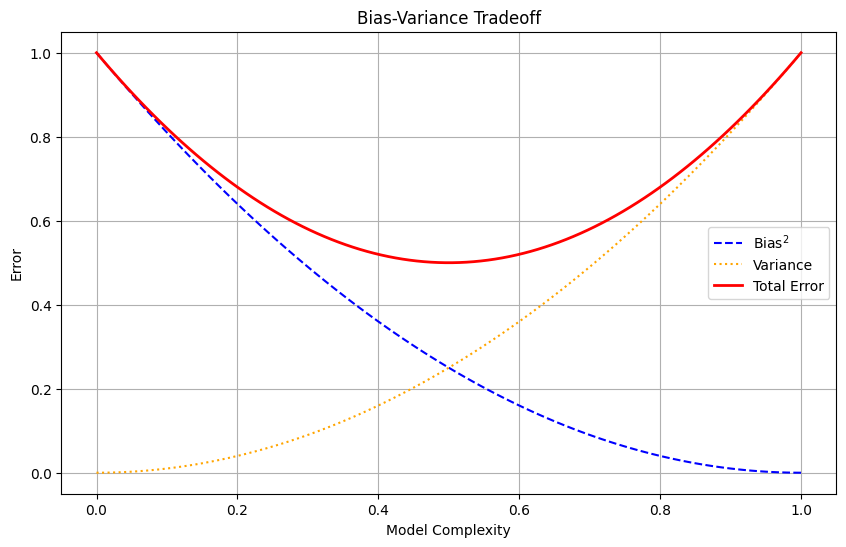

In [12]:
# Generate x-axis data for model complexity
complexity = np.linspace(0, 1, 100)
bias_sq = (1 - complexity)**2
variance = complexity**2
total_error = bias_sq + variance

plt.figure(figsize=(10, 6))
plt.plot(complexity, bias_sq, label='Bias$^2$', color='blue', linestyle='--')
plt.plot(complexity, variance, label='Variance', color='orange', linestyle=':')
plt.plot(complexity, total_error, label='Total Error', color='red', linewidth=2)

plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)

## Scatter Plots

A scatter plot is a type of graph that displays values for typically two variables as a set of points on a two-dimensional plane. It's used to visualize the relationship between those variables and can help identify patterns, trends, or correlations. 

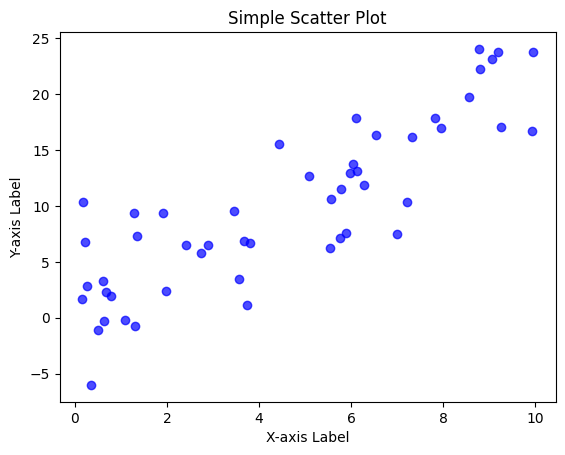

In [13]:
x = np.random.rand(50) * 10
y = 2 * x + np.random.randn(50) * 5

plt.scatter(x, y, color='blue', alpha=0.7)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Scatter Plot')
plt.show()

# Mini-Project

Now lets try to apply what we've learnt on some real dataset. For this we are using the world happiness report dataset from kaggle. The World Happiness Report is a landmark survey of the state of global happiness to learn more about this dataset visit https://www.kaggle.com/datasets/unsdsn/world-happiness

Lets start by importing the data and running some simple eda to explore what it looks like

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('world_happiness_report_2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [19]:
df.shape

(156, 9)

from our basic information we can see that there are 9 columns in total with 156 countries. All records are non-null. We can also validate whether the values have any anomolies (for example if score is negative) but for this session lets omit that and go straight to visualization

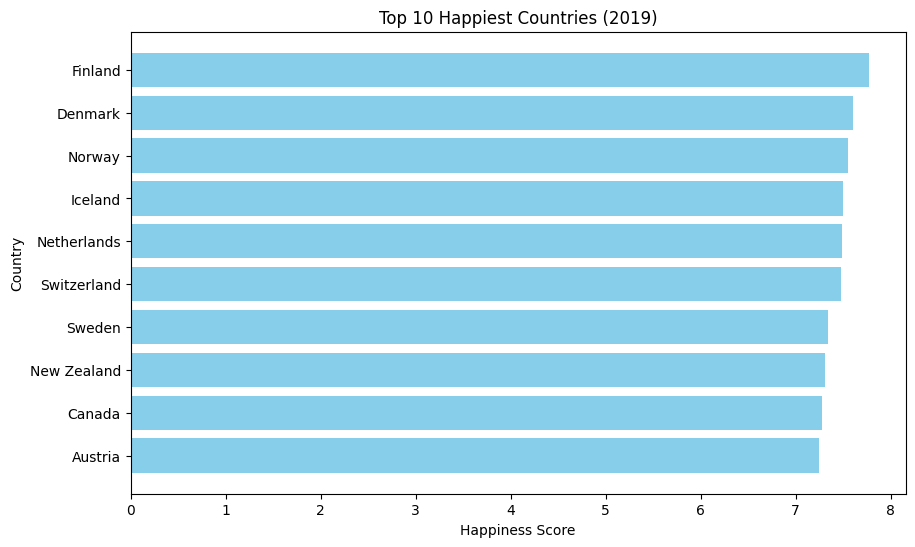

In [20]:
top10 = df.nlargest(10, 'Score')

plt.figure(figsize=(10, 6))
plt.barh(top10['Country or region'], top10['Score'], color='skyblue')
plt.title('Top 10 Happiest Countries (2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Highest score on top
plt.show()

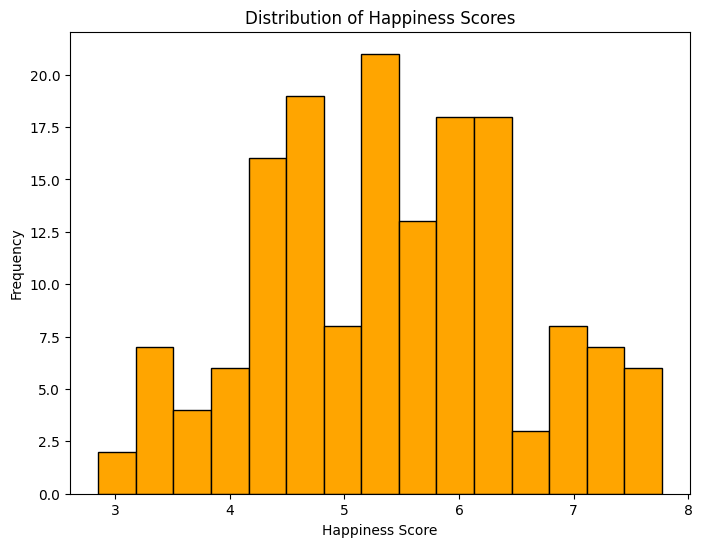

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['Score'], bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

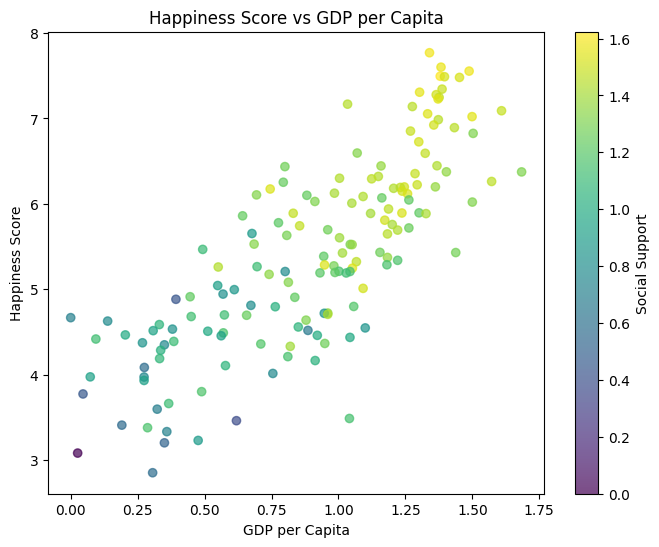

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GDP per capita'], df['Score'], alpha=0.7, c=df['Social support'], cmap='viridis')
plt.colorbar(label='Social Support')
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

C:\Users\Adil\AppData\Local\Temp\ipykernel_12048\479120293.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=gdp_categories)


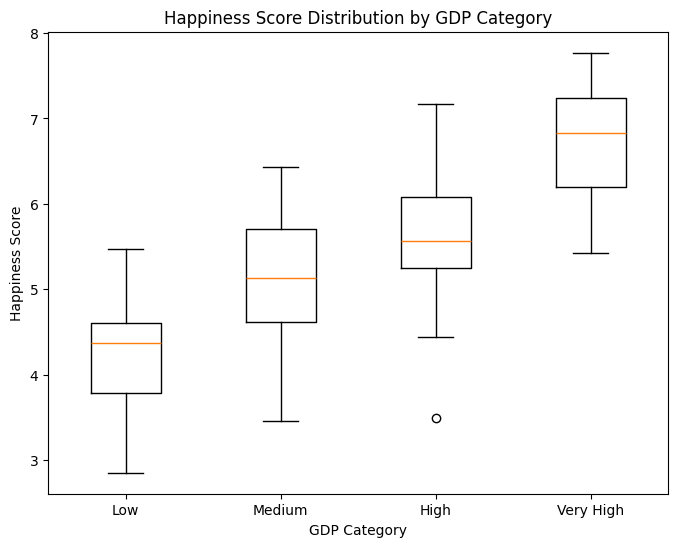

In [23]:
df['GDP Category'] = pd.qcut(df['GDP per capita'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

gdp_categories = ['Low', 'Medium', 'High', 'Very High']
data_to_plot = [df[df['GDP Category'] == cat]['Score'] for cat in gdp_categories]

plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=gdp_categories)
plt.title('Happiness Score Distribution by GDP Category')
plt.xlabel('GDP Category')
plt.ylabel('Happiness Score')
plt.show()

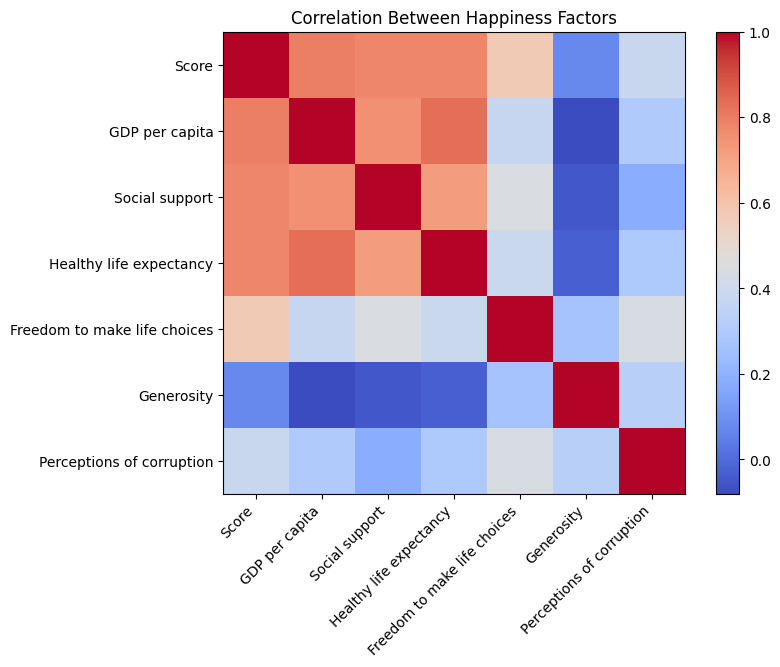

In [24]:
cols = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
corr = df[cols].corr()

plt.figure(figsize=(10, 6))
im = plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(im, fraction=0.046, pad=0.04)

plt.xticks(range(len(cols)), cols, rotation=45, ha='right')
plt.yticks(range(len(cols)), cols)

plt.title('Correlation Between Happiness Factors')
plt.show()

Based on these visualizations, happiness is strongly correlated with GDP per capita, social support, and healthy life expectancy, with the happiest countries like Finland and Denmark showing high scores in these areas. The general distribution of happiness scores is concentrated between 4.5 and 6.5, but there is a clear trend showing that countries with higher GDP categories have progressively higher median happiness scores with less variability. Conversely, a negative correlation exists between happiness and perceptions of corruption, while generosity shows little to no correlation. This indicates that while wealth is a significant factor, social and institutional health are also crucial components of a nation's happiness.

## Conclusion

Python makes it very easy to create powerful visualizations and is a must have skill for the Data Scientists toolkit. The matplotlib gallery a a good place to start and see the things we can do with matplotlib (and how to do them)